## Problem Statement - 
    * To build a model to predict whether the loan of the applicant will be approved or not.

Input Variables :

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Target Variable :
    
   - Loan_Status

Importing the required libraries for this project,

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the given dataset

In [2]:
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


There are 614 rows and 13 columns in the given dataset and we can see that numerical and categorical data's present in the given dataset and our target variable is categorical data and it is binary classification problem.

In [3]:
# This will gives the details about data-types, non null count and memory usgae of the each column in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that there is null values present in dataset and we will see how to treat null values later in this part.

In [5]:
#This will show only the numerical data description which is min,max value,standard deviation, mean, and quantile range.

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# This will show the categorical data description like top,unique and count of data's

df.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002345,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


    * We will see how the data has been distributed in the given dataset through visualization plot,

    * We can see that this graph only shows that numerical data distribution and we can see there are outliers exist in applicantincome, Coapplicantincome, loanamount.
    
    * we should check whether the outliers need to remove in this case or not in later part as ,
        there is a possibility that person will be getting high income may apply for loan ,So in this case removing this will affect our model and we might be losing some important data as well.
    
    * we will be confirm this with using boxplot in later part.

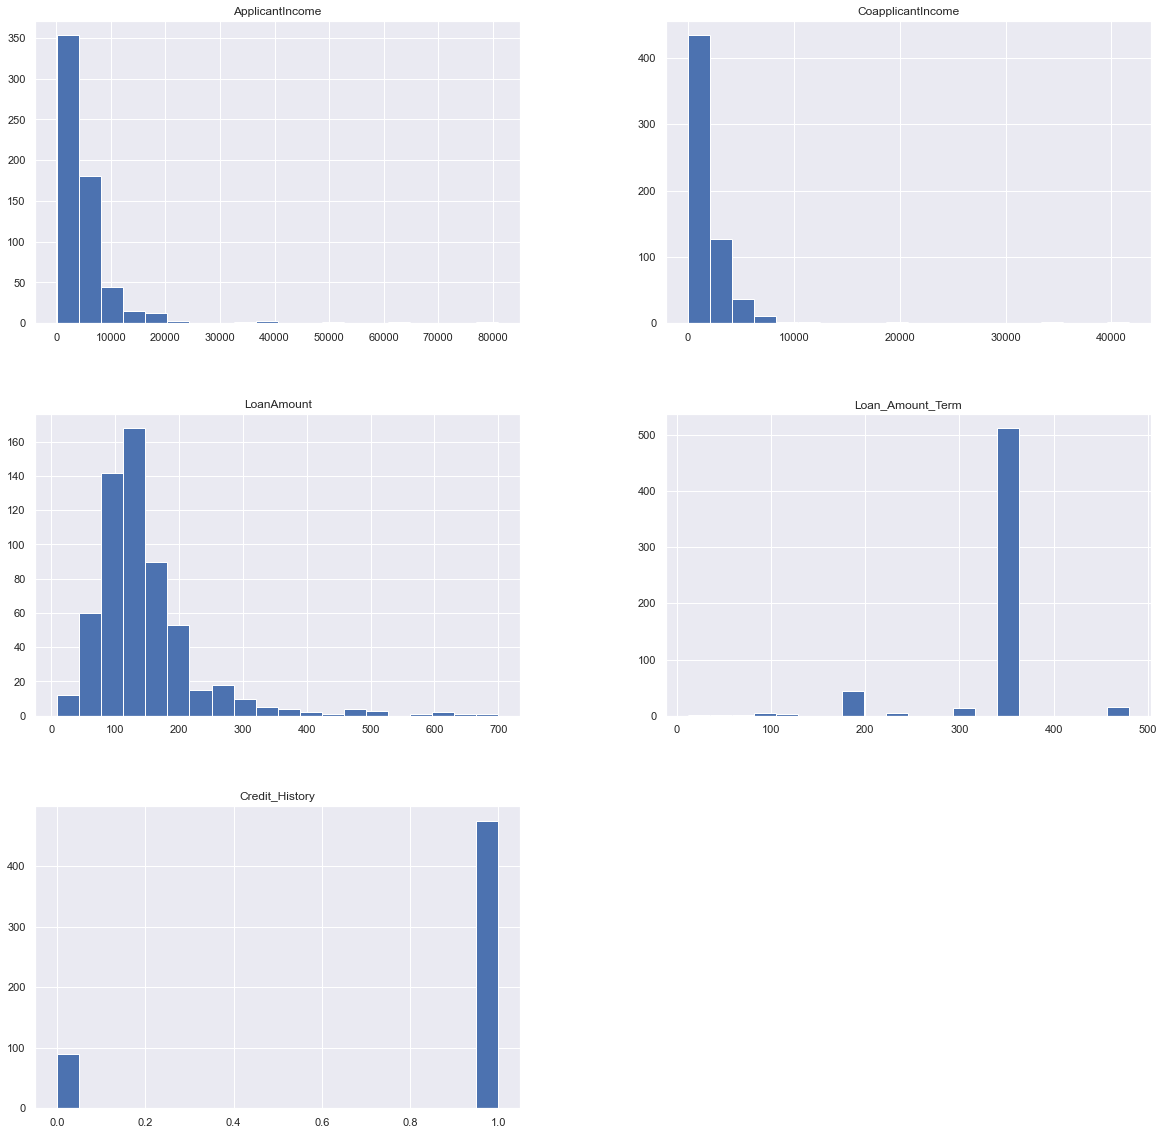

In [7]:
sns.set_theme()
df.hist(figsize = (20,20), bins = 20)
plt.show()

As per above graph,we can see the col credit history has only two values which is 1 / 0 and col loan amount term is skewed negative mostly.

Loan amount term can be anything depends on applicant loan amount and the plan he/she chosen.So removing these data will have a serious impact on our dataset and will affect our model for better prediction.

Also rest of the datset is categorical and we can't apply outliers to these col.

We will see each column data distribution using plot,

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

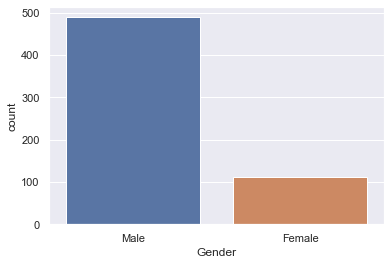

In [9]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Gender,Loan_Status'>

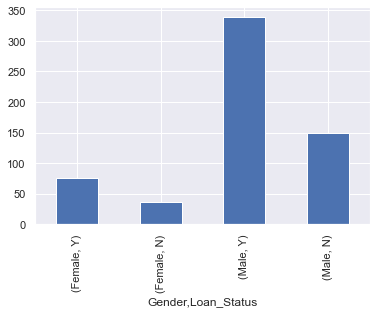

In [10]:
df.groupby('Gender')['Loan_Status'].value_counts().plot.bar()

From the above graph, we can tell that male is having more counts and checking the variable with target variable- loan status and loan is approving for most of the males than females.

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

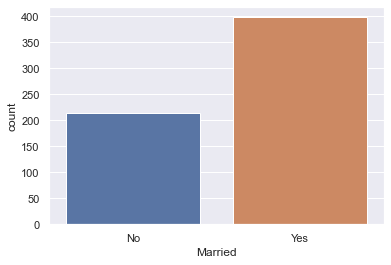

In [12]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Married,Loan_Status'>

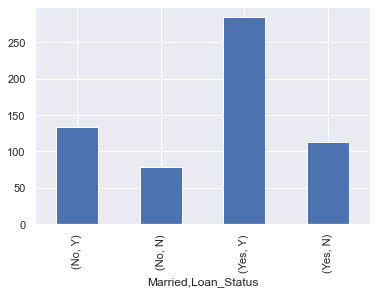

In [13]:
df.groupby('Married')['Loan_Status'].value_counts().plot.bar()

Loan applicants who have applied for loan is married mostly and checking with target variable,We can see clearly that loan is sanctioning for most of the married people than un-married

In [14]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

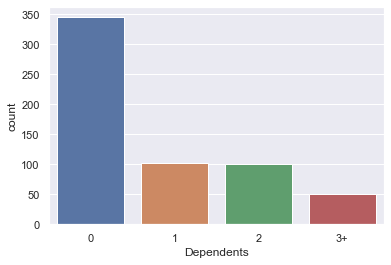

In [15]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Dependents,Loan_Status'>

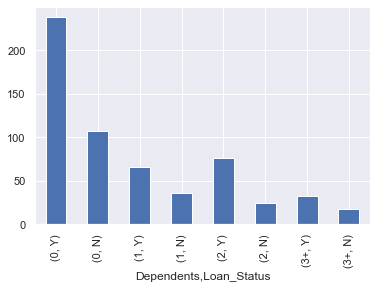

In [16]:
df.groupby('Dependents')['Loan_Status'].value_counts().plot.bar()

Applicants who is not having any dependants is high in count and also from the above bar plot, we can see that Applicants who is having 0 dependants having HIGH chance of getting his/her loan approved.

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

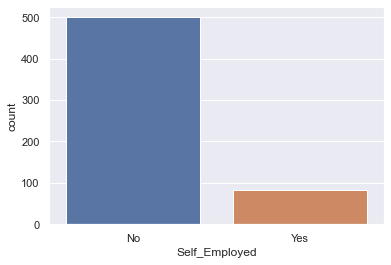

In [19]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Self_Employed,Loan_Status'>

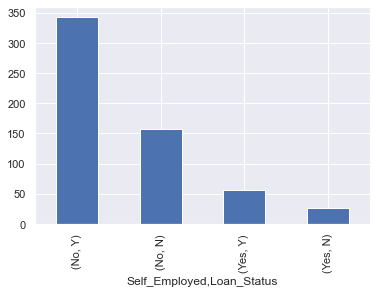

In [20]:
df.groupby('Self_Employed')['Loan_Status'].value_counts().plot.bar()

So most of the applicants are not self employed and upon checking with target variable it is clear that loan is getting approve for most of the employed people who is not belong to self-employed category.

In [21]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

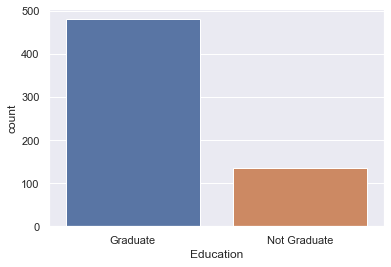

In [22]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Education,Loan_Status'>

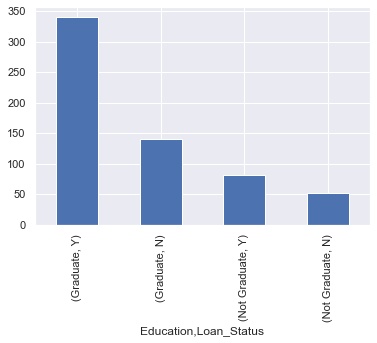

In [23]:
df.groupby('Education')['Loan_Status'].value_counts().plot.bar()

Applicants are mostly Graduate in the given dataset and in terms of education,loan is getting approved for graduates than not graduate applicants.

In [24]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

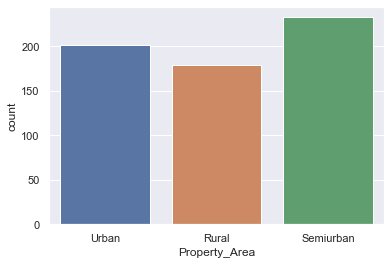

In [25]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Property_Area,Loan_Status'>

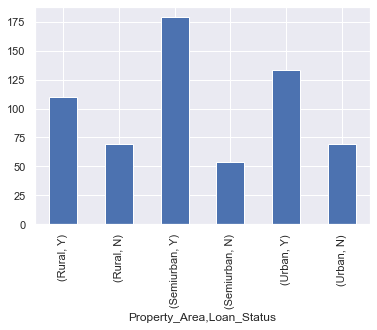

In [26]:
df.groupby('Property_Area')['Loan_Status'].value_counts().plot.bar()

Applicants applying for loan is having property area to get the loan and our dataset is showing that Semi-Urban property area ranks high and loan is getting approval for the applicants who is having property in Semi - Urban and then Urban places.

In [27]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

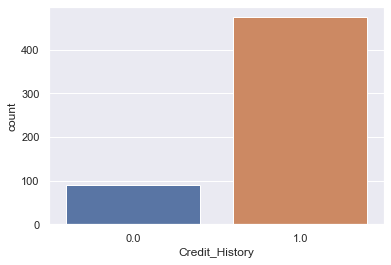

In [28]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Credit_History,Loan_Status'>

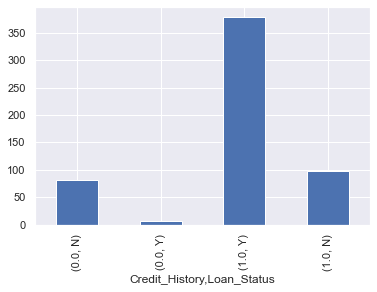

In [29]:
df.groupby('Credit_History')['Loan_Status'].value_counts().plot.bar()

As per the plot,we can see that most of the applicants have credit history and in terms of loan status, the applicants who are having credit history has high chances of getting loan approved.

In [30]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

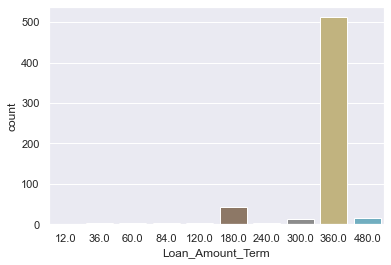

In [31]:
sns.countplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term,Loan_Status'>

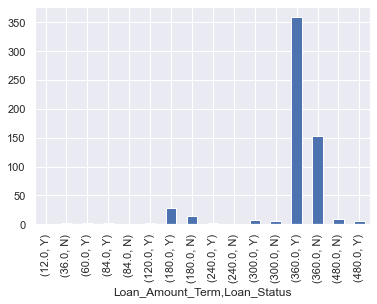

In [32]:
df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts().plot.bar()

So we can see that our dataset is having the loan amount term has 360 in months,and in terms of loan status,applicants who have avail loan for 360 (in months) are having more chances for getting the loan approved.

In [33]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

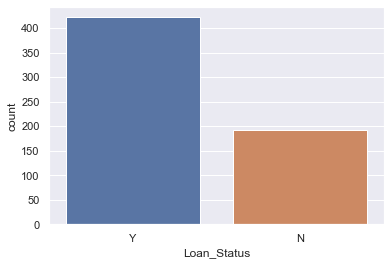

In [34]:
sns.countplot(df['Loan_Status'])

We can see that our target variable is having imbalance classes and it needs to be balanced.
We will take care that in later part.

So from the above plot we can conclude , 
    
    1) We can see that Gender - Male is having high chances for getting loan approved.
    2) Applicants who are Married  is having high chances for their loan approval.
    3) Applicants who are Graduate are high possibility of their loan getting approval
    4) Applicants who are Not self employed are high chances for their loan to be get approved.
    5) Applicants who are not having any dependants are having more chances of loan to get approved.
    Applicants who is having credit history and having loan amount term of 360 (in months) has high chance for their loan to get approved.
    

Splitting the categorical and numerical data from the dataset as we have missing values in the dataset,

In [35]:
num = df.select_dtypes(exclude = np.object)
cat = df.select_dtypes(include = np.object)

In [36]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

We are treating the missing values for the numerical data by mean.

In [37]:
num['LoanAmount'] = num['LoanAmount'].fillna(num['LoanAmount'].mean())
num['Loan_Amount_Term'] = num['Loan_Amount_Term'].fillna(num['Loan_Amount_Term'].mean())
num['Credit_History'] = num['Credit_History'].fillna(num['Credit_History'].mode()[0])
num['CoapplicantIncome'] = num['CoapplicantIncome'].replace(0,num['CoapplicantIncome'].mean())

In [38]:
#We can see that there is outliers exist in all columns except credit history as credit history has only 2 values 0/1.
num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2342.092871,146.412162,342.000000,0.855049
std,6109.041673,2621.427966,84.037468,64.372489,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1621.245798,100.250000,360.000000,1.000000
50%,3812.500000,1621.245798,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [39]:
cat.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

We are treating the missing values for the categorical data by mode.

In [40]:
cat['Gender'] = cat['Gender'].fillna(cat['Gender'].mode()[0])
cat['Married'] = cat['Married'].fillna(cat['Married'].mode()[0])
cat['Dependents'] = cat['Dependents'].fillna(cat['Dependents'].mode()[0])
cat['Self_Employed'] = cat['Self_Employed'].fillna(cat['Self_Employed'].mode()[0])

In [41]:
cat.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002345,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


As null values has been traeted so far from the dataset,Applying Label Encoder() technique to convert the categorical into numerical data.

In [42]:
le = LabelEncoder()
cat = cat.apply(le.fit_transform)

In [43]:
cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0,1
610,610,1,1,3,0,0,0,1
611,611,1,1,1,0,0,2,1
612,612,1,1,2,0,0,2,1


As categorical data has been treated and now we have 614 rows and 8 columns.
We can't use outliers for categorical data even though we converted into numerical.

So let's check the outliers using box and dist plot,

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

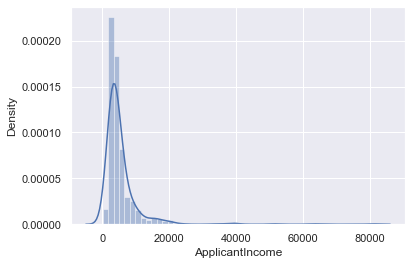

In [44]:
sns.distplot(num['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome'>

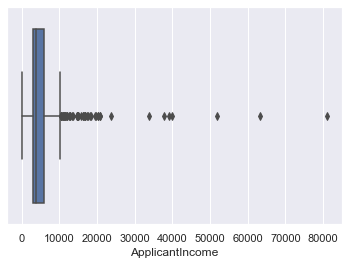

In [45]:
sns.boxplot(num['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

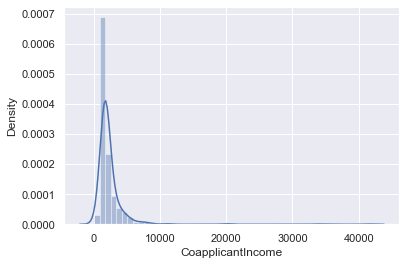

In [46]:
sns.distplot(num['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

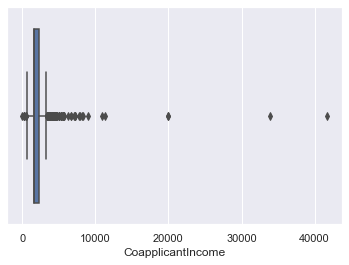

In [47]:
sns.boxplot(num['CoapplicantIncome'])

As per the above plot, We confirmed that column - "ApplicantIncome" and "CoapplicantIncome" is having outliers but, if you look into the data,it is about the income of the applicants.

There is a possibility that applicants salary will be > 10K .So we can't remove the outliers here in this case as it will be resulting in loss of most important data.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

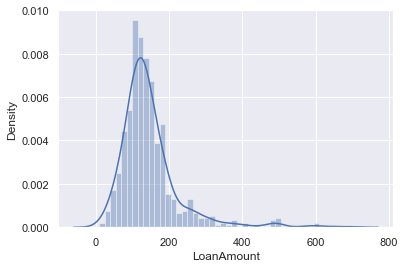

In [48]:
sns.distplot(num['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

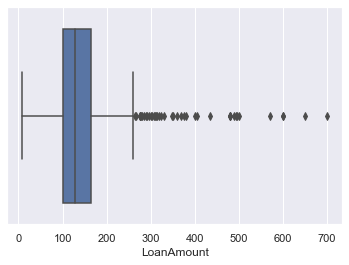

In [49]:
sns.boxplot(num['LoanAmount'])

As per the above plot,It is showing clearly that loan amount can be of any amount starting from > 1L ,here we can see outliers for >3L and as we can't remove these data as we will lose most important data.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

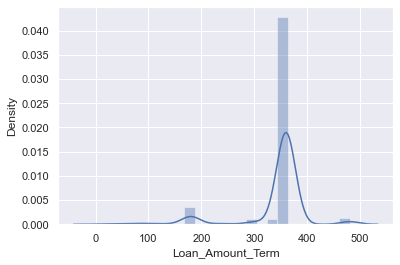

In [50]:
sns.distplot(num['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

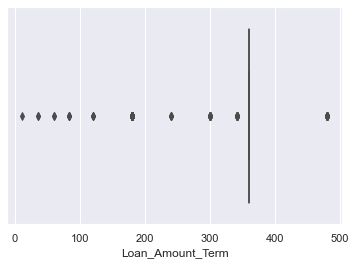

In [51]:
sns.boxplot(num['Loan_Amount_Term'])

As loan amount term are in months, we can see that most of the applicants has loan amount term has 360 (in months) which is 30 years but there is a possibility applicants term can be less than 30 years as well.

Also Loan_Amount_Term is completely depends on the loan amount which applicant is availing and the payment of applicant and payback years.

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

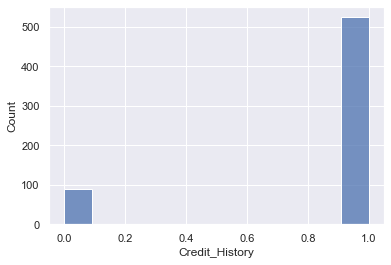

In [52]:
sns.histplot(num['Credit_History'])

<AxesSubplot:xlabel='Credit_History'>

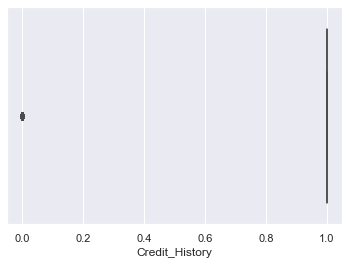

In [53]:
sns.boxplot(num['Credit_History'])

As see earlier in data distribution and now as well,it si confirmed that credit history is having only 2 values 0/1 and this is not considered as outliers as most of the data is having credit history and where few is not having credit history.

Checking the correlation matrix for numerical and categorical dataset,

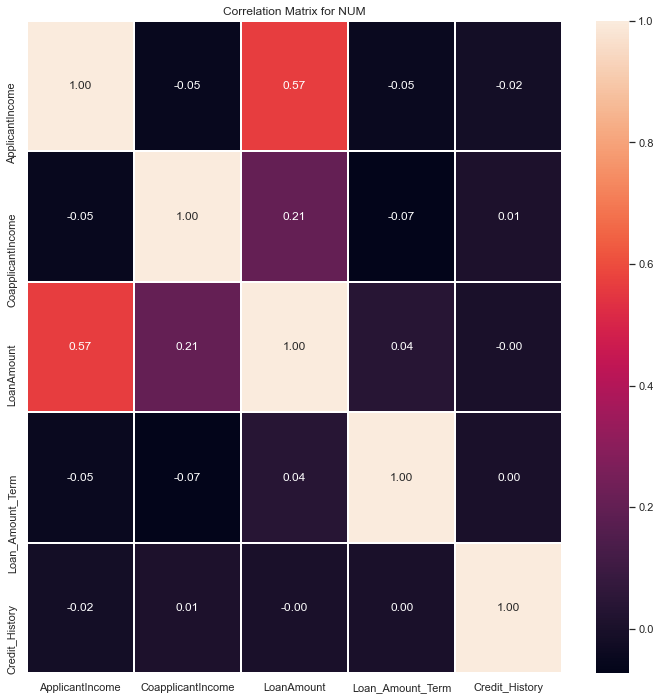

In [54]:
corr = num.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix for NUM")
plt.show()

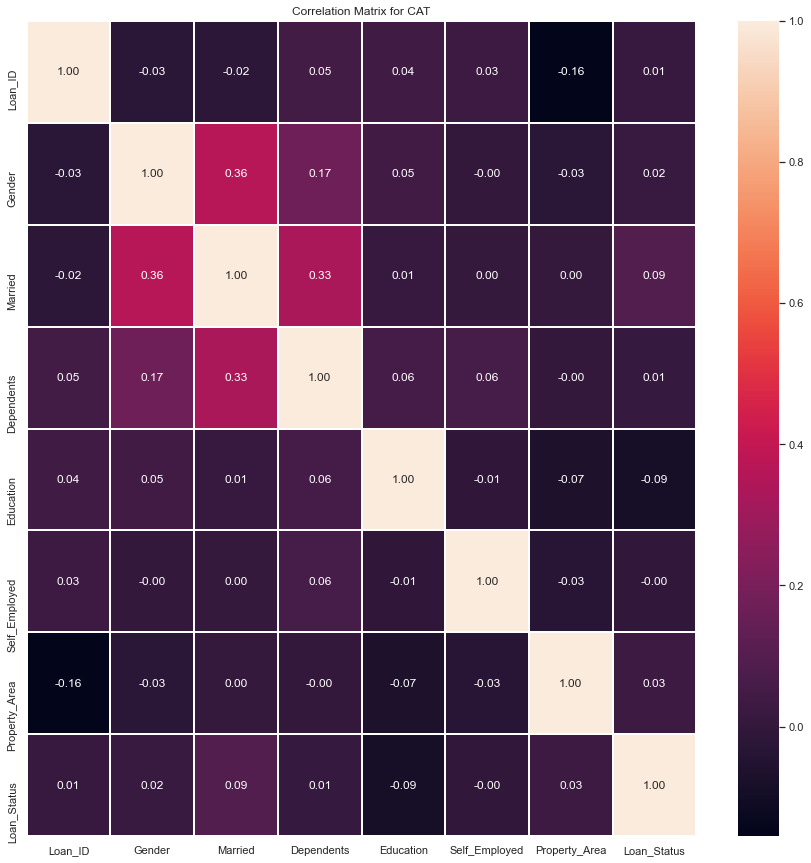

In [55]:
corr = cat.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix for CAT")
plt.show()

Merging Categorical and numerical dataset into single for further process,

In [56]:
df1 = pd.concat([num,cat],axis = 1)
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,1621.245798,146.412162,360.0,1.0,0,1,0,0,0,0,2,1
1,4583,1508.000000,128.000000,360.0,1.0,1,1,1,1,0,0,0,0
2,3000,1621.245798,66.000000,360.0,1.0,2,1,1,0,0,1,2,1
3,2583,2358.000000,120.000000,360.0,1.0,3,1,1,0,1,0,2,1
4,6000,1621.245798,141.000000,360.0,1.0,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,1621.245798,71.000000,360.0,1.0,609,0,0,0,0,0,0,1
610,4106,1621.245798,40.000000,180.0,1.0,610,1,1,3,0,0,0,1
611,8072,240.000000,253.000000,360.0,1.0,611,1,1,1,0,0,2,1
612,7583,1621.245798,187.000000,360.0,1.0,612,1,1,2,0,0,2,1


In [57]:
#Dropping the loan id as it is same as index id and dropping this will not bring any impact on this dataset.

df1 = df1.drop(columns = ['Loan_ID'],axis = 1)

Splitting X and Y values ,

In [58]:
x = df1.drop(columns = ['Loan_Status'],axis = 1)
y = df1['Loan_Status']

In [59]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

As we discussed earlier ,We have imbalance classes on target variables,So let's check how to deal this imbalance dataset,

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

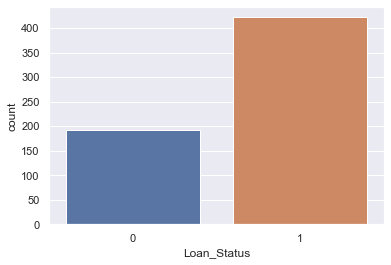

In [60]:
sns.countplot(df1['Loan_Status'])

Applying SMOTE () method to balance the imbalnced data's.

In [61]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

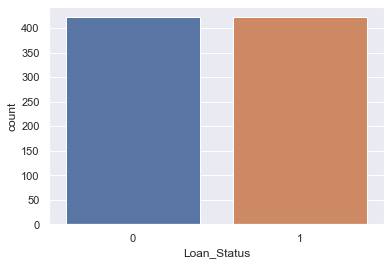

In [62]:
# We can see our classes are balanced now,Let's proceed to next steps,
sns.countplot(y_over)

Applying Standardization techniques to equalize the range of data 0-1

In [63]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_over)

Train- Test Split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y_over, test_size = 0.25, random_state = 399)

So here comes the very Interesting and important part of oor project which is model building.

## Model Building - 
    
    1) Decision Tree Classifier
    2) Random Forest Classifier
    3) Ada Boost Classifier
    4) Gradient Boost Classifier
    
  So here I am applying the above classifier algorithms to train and test our data and see which model is best,

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7440758293838863
Confusion Matrix 
 [[70 33]
 [21 87]]
F1 Score 
 0.7631578947368423
Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       103
           1       0.72      0.81      0.76       108

    accuracy                           0.74       211
   macro avg       0.75      0.74      0.74       211
weighted avg       0.75      0.74      0.74       211

ROC AUC Score 
 0.7425836030204962


In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8293838862559242
Confusion Matrix 
 [[ 73  30]
 [  6 102]]
F1 Score 
 0.85
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       103
           1       0.77      0.94      0.85       108

    accuracy                           0.83       211
   macro avg       0.85      0.83      0.83       211
weighted avg       0.85      0.83      0.83       211

ROC AUC Score 
 0.8265911542610571


In [67]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7393364928909952
Confusion Matrix 
 [[62 41]
 [14 94]]
F1 Score 
 0.7736625514403292
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       103
           1       0.70      0.87      0.77       108

    accuracy                           0.74       211
   macro avg       0.76      0.74      0.73       211
weighted avg       0.75      0.74      0.73       211

ROC AUC Score 
 0.736156058971593


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("F1 Score \n", f1_score(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7488151658767772
Confusion Matrix 
 [[60 43]
 [10 98]]
F1 Score 
 0.7871485943775101
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.58      0.69       103
           1       0.70      0.91      0.79       108

    accuracy                           0.75       211
   macro avg       0.78      0.74      0.74       211
weighted avg       0.77      0.75      0.74       211

ROC AUC Score 
 0.7449658396260338


Roc Curve for all models:

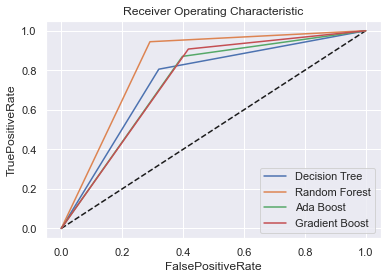

In [69]:
y_pred_prob1 = dt.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = rfc.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = abc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = gbc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "Ada Boost")
plt.plot(fpr4, tpr4, label= "Gradient Boost")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

As the target variable is imbalanced in nature and then we balanced it using SMOTE() method, We can go with F1 Score for checking the accuracy.

As per f1 Score, Random Forest Classifier is having high Score out of all models built.

Chances are there that our models are either over-fit or under-fit,We will check and confirm that using Cross Validation Score technique.

In [70]:
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : 0.8080938292476754


In [71]:
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)
print("CV Score of RFC :", scr_rfc.mean())

CV Score of RFC : 0.8306635672020288


In [72]:
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)
print("CV Score of ABC :", scr_abc.mean())

CV Score of ABC : 0.7843970132431671


In [73]:
scr_gbc = cross_val_score(gbc,x_over,y_over,cv=5)
print("CV Score of GBC :", scr_gbc.mean())

CV Score of GBC : 0.8069315300084531


As per Cross Validation Score, gradient Boost model is having high score.

But I am choosing the best model based on the model whoch is having less difference between Model accuracy and Cross validation score.

So as per this method, ADA BOOST CLASSIFIER is chosen as best model.

Lets try to increase the accuracy of model,

Applying Hyper parameter Tuning to increase the accuracy of model,

In [99]:
param = {'base_estimator' : [None] ,
         'n_estimators': [50,60,70,80,90,100,120], 
         'learning_rate':[1.0,1.2,1.4,1.6,1.8],
         'random_state' : [None],
         'algorithm': ['SAMME.R'],
         
          }

In [100]:
grid_search = GridSearchCV(abc,param_grid = param, cv=5)

In [101]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'base_estimator': [None],
                         'learning_rate': [1.0, 1.2, 1.4, 1.6, 1.8],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 120],
                         'random_state': [None]})

In [102]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [115]:
final = AdaBoostClassifier(base_estimator = None ,learning_rate =1.0, n_estimators = 120,
                               algorithm = 'SAMME.R', random_state = 11)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Accuracy score \n", accuracy_score(y_test,pred))
print("Confusion Matrix \n", confusion_matrix(y_test,pred))
print("F1 Score \n", f1_score(y_test,pred))
print("Classification Report \n", classification_report(y_test,pred))
print("ROC AUC Score \n", roc_auc_score(y_test,pred))

Accuracy score 
 0.7677725118483413
Confusion Matrix 
 [[67 36]
 [13 95]]
F1 Score 
 0.7949790794979079
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.65      0.73       103
           1       0.73      0.88      0.79       108

    accuracy                           0.77       211
   macro avg       0.78      0.77      0.76       211
weighted avg       0.78      0.77      0.76       211

ROC AUC Score 
 0.7650575332614168


So After tried different values with different parameter, 79.5% is the best accuracy for this model.

ROC Curve for the best model :

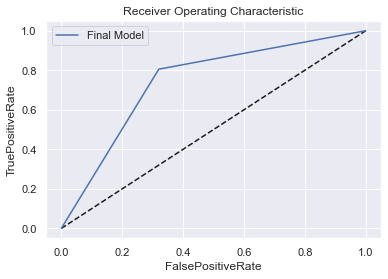

In [116]:
y_pred_fin = final.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)




plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Model")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Finally !!!   Saving the Model

In [117]:
import joblib
joblib.dump(final,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']